# Machine Learning pipeline using scikit-learn

As a part of this problem, we are provided with the information about the stores (location, size, etc), products (weight, category, price, etc) and historical sales data. Using this information, we have to forecast the sales of the products in the stores.

## Building a prototype model

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Read the train data

In [2]:
train_data = pd.read_csv(r"C:\Users\Lenovo\Downloads\train_v9rqX0R.csv")

## Data exploration and preprocessing

In [3]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)

In [5]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
train_data['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [12]:
import category_encoders as ce

In [13]:
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],use_cat_names=True)

In [14]:
train_data = OHE.fit_transform(train_data)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [20]:
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))

StandardScaler()

In [21]:
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [25]:
train_data.Item_MRP.unique()

array([ 1.74745381, -1.48902325,  0.01004021, ..., -1.33933659,
        1.18078287, -1.05226104])

### Model Building

Importing libraries

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Seperating the independant and target variable

In [29]:
X = train_data.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
y = train_data['Item_Outlet_Sales']

Randomly split the data

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [35]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((6392, 45), (2131, 45), (6392,), (2131,))

Create an object of the LinearRegression model

In [36]:
model_LR = LinearRegression()

Fit the model with training data

In [37]:
model_LR.fit(X_train,y_train)

LinearRegression()

Predict the target on test and train data


In [38]:
predict_train = model_LR.predict(X_train)
predict_test = model_LR.predict(X_test)

Root Mean Squared error on train and test data

In [39]:
print('RMSE on train data :',mean_squared_error(y_train,predict_train)**(0.5))
print('RMSE on test data :', mean_squared_error(y_test,predict_test)**(0.5))

RMSE on train data : 1120.4061374764838
RMSE on test data : 1148.7364681364163


Create an object of RandomForestRegressor

In [50]:
model_RFR = RandomForestRegressor(max_depth=10)

In [51]:
model_RFR.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [52]:
predict_train_RF = model_RFR.predict(X_train)
predict_test_RF = model_RFR.predict(X_test)


In [53]:
print("RMSE on train data :",mean_squared_error(y_train,predict_train_RF)**(0.5))
print("RMSE on test data :",mean_squared_error(y_test,predict_test_RF)**(0.5))

RMSE on train data : 896.5456277100153
RMSE on test data : 1117.743378333138


Feature importance -
 plotting the most important 7 features

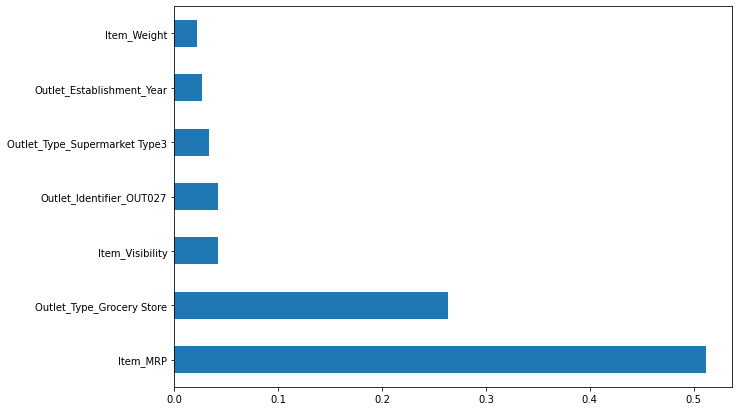

In [54]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_,index=X_train.columns)
feat_importances.nlargest(7).plot(kind='barh')

Train the same random forest model using these 7 features only and observe the change in RMSE values for the train and the validation set.

Train data with most important 7 features

In [58]:
train_X_If = X_train[['Item_MRP','Outlet_Type_Grocery Store','Item_Visibility','Item_Weight','Outlet_Type_Supermarket Type3','Outlet_Establishment_Year','Outlet_Identifier_OUT027']]

Test data with most important 7 features

In [59]:
test_X_If = X_test[['Item_MRP','Outlet_Type_Grocery Store','Item_Visibility','Item_Weight','Outlet_Type_Supermarket Type3','Outlet_Establishment_Year','Outlet_Identifier_OUT027']]

Create an object of the RandomForest model

In [61]:
model_RFR_1 = RandomForestRegressor(max_depth=10)

Fit the model with training data 

In [66]:
model_RFR_1.fit(train_X_If,y_train)

RandomForestRegressor(max_depth=10)

Predict the target on training and test data

In [67]:
predict_train_if = model_RFR_1.predict(train_X_If)
predict_test_if = model_RFR_1.predict(test_X_If)

Root mean squared error on train and test data 

In [70]:
print("RMSE on train data :", mean_squared_error(y_train,predict_train_if)**(0.5))
print("RMSE on test data :", mean_squared_error(y_test,predict_test_if)**0.5)

RMSE on train data : 902.9121418638339
RMSE on test data : 1118.2443058353074


## Identifying features to build the ML pipeline

Selected Features and Preprocessing Steps
1. Create the required binary features
We will create a custom transformer that will add 3 new binary columns to the existing data.

    Outlet_Type : Grocery Store
    Outlet_Type : Supermarket Type3
    Outlet_Identifier_OUT027

2. Data Preprocessing and transformations.

We will use a ColumnTransformer to do the required transformations. It will contain 3 steps.

    Drop the columns that are not required for model training
    Impute missing values in the column Item_Weight using the average
    Scale the column Item_MRP using  StandardScaler()



### Importing required libraries 

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [73]:
# Read the training data set
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\train_v9rqX0R.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
train_X = data.drop('Item_Outlet_Sales',axis=1)
train_y = data['Item_Outlet_Sales']

### Building Pipeline

In the transform method, we will define all the 3 columns that we want after the first stage in our ML pipeline.

In [75]:
from sklearn.base import BaseEstimator

In [76]:
class OutletTypeEncoder(BaseEstimator):
    def _init_(self):
        pass
    def fit(self,documents,y=None):
        return self
    def transform(self,x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type']=='Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type']=='Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier']=='OUT027')*1
        
        return x_dataset
        

Next we will define the pre-processing steps required before the model building process.

    1.Drop the columns – Item_Identifier, Outlet_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Establishment_Year
    2.Impute missing values in column Item_Weight with mean
    3.Scale the column Item_MRP using StandardScaler().


In [82]:
pre_process = ColumnTransformer(remainder='passthrough',transformers=[('drop_columns','drop',['Item_Identifier','Outlet_Identifier','Outlet_Type','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Establishment_Year']),('impute_item_weight',SimpleImputer(strategy='mean'),['Item_Weight']),('scaledata',StandardScaler(),['Item_MRP'])])

### Predict target

Define pipeline

In [83]:
model_pipeline = Pipeline(steps=[('get_outlet_binary_columns',OutletTypeEncoder()),('pre_processing',pre_process),('randomforest',RandomForestRegressor(max_depth=10,random_state=2))])

Fit the pipeline with the training data

In [84]:
model_pipeline.fit(train_X,train_y)

Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()),
                ('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['Item_Identifier',
                                                   'Outlet_Identifier',
                                                   'Outlet_Type',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Establishment_Year']),
                                                 ('impute_item_weight',
                                                  Sim

Predict target values on training data

In [85]:
model_pipeline.predict(train_X)

array([4448.88735982,  722.31027393, 2272.85596206, ..., 1285.78869824,
       1763.29396402, 1176.46354868])

Now, we will read the test data set and we call predict function only on the pipeline object to make predictions on the test data.

Read the test data

In [86]:
test = pd.read_csv(r'C:\Users\Lenovo\Downloads\test_AbJTz2l.csv')

In [87]:
model_pipeline.predict(test)

array([1549.10043375, 1298.70335214,  665.40902995, ..., 1878.510635  ,
       3310.92931146, 1368.23140366])

#END